# Project1: Restaurants and Ethnical Population Correlation

@Author: Hao

@Date: 1/11/19

## <span style="color:darkblue">Data Exploration</span>
* Restaurants Data from Yelp
  
  * Restaurants in Chicago (by zip code and restaurant type)
  * Restaurants in New York (by zip code and restaurant type)
  
* Population Distribution from Census Bureau:
  
  * Population Distribution in Chicago (by zip code and language)
  * Population Distribution in New York (by zip code and language)

* Restaurants Data from Yelp merged with License Issued Date:
  
  * Merged Dataset of Chicago Restaurants from Yelp anbd Chicago Business License. 
 
## <span style="color:darkblue">Analysis Details</span>
* Analysis 1: Correlation of Population Distribution and Restaurant Distribution
    * Conclusion I: Large Minority Population (maximum population percentage more than 4%) tends to go to the restaurants opened by the same population. 
    * Conclusion II: Small Minority Population (maximum population percentage less than 3%) tends to go to the restaurants opened by other population, but with similar food style. 
 

## <span style="color:darkblue">Results</span>

### <span style="color:blue"> Analysis I: Minority Population Distribution versus Restaurant Type Distribution</span>

|Colormap|
|-----------|
|<img src="../Chart/Restaurant_Population_Corr_Chicago.png" /> |

|Colormap|
|-----------|
|<img src="../Chart/Restaurant_Population_Corr_New_York.png" /> |


<br>


# Initialization

In [90]:
!pip install geopy

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [91]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from geopy.distance import vincenty

In [92]:
## Import Data
# -----------------------------
# 1.1 Yelp Data Chicago
Yelp_Chicago_df = pd.read_csv("../Data/Yelp_Restaurants_Chicago.csv")
# 1.2 Yelp Data New York
Yelp_New_York_df = pd.read_csv("../Data/Yelp_Restaurants_New_York.csv")
# 2.1 Census by Population Chicago
Population_by_Language_Chicago_df = pd.read_csv("../Data/Population_by_Language_Chicago.csv")
# 2.2 Census by Population New York
Population_by_Language_New_York_df = pd.read_csv("../Data/Population_by_Language_New_York.csv")
# 3.1 Merged Yelp and License Data Chicago
Yelp_License_Merge_Chicago_df = pd.read_csv("../Data/Yelp_License_Merge.csv")

# Analysis I

### Part I: Chicago Restaurants and Population Correlation Analysis

In [93]:
# Get the two data set column names
print(Yelp_Chicago_df.columns)
print(Population_by_Language_Chicago_df.columns)

Index(['zip', 'city', 'state', 'name', 'price', 'rating', 'review_count',
       'type', 'latitude', 'longitude'],
      dtype='object')
Index(['Population', 'English', 'Spanish', 'French', 'Italian', 'Portuguese',
       'German', 'Greek', 'Russian', 'Polish', 'Chinese', 'Japanese', 'Korean',
       'Thai', 'Vietnamese', 'Arabic', 'Zipcode'],
      dtype='object')


In [94]:
## Get Yelp Data by zip Code and Type Pivotal Table
# --------------------------------
# Count restaurants by Zip Code and Type
Yelp_Chicago_by_Zipcode_Type_df = Yelp_Chicago_df.groupby(["zip","type"])["name"].count().reset_index()
Yelp_Chicago_by_Zipcode_Type_df.rename(columns={"name":"count"},inplace=True)
# Convert to pivotal table
Yelp_Chicago_by_Zipcode_Type_pt = Yelp_Chicago_by_Zipcode_Type_df.pivot(index="zip",columns="type",values="count")
# Fill in 0 for NaN
Yelp_Chicago_by_Zipcode_Type_pt = Yelp_Chicago_by_Zipcode_Type_pt.fillna(0)
Yelp_Chicago_Count_by_Zipcode_Type_df = Yelp_Chicago_by_Zipcode_Type_pt.reset_index()
Yelp_Chicago_Count_by_Zipcode_Type_df.head()

type,zip,American (New),Arabian,Argentine,Asian Fusion,Austrian,Brazilian,British,Cajun/Creole,Caribbean,...,Latin American,Malaysian,Mediterranean,Mexican,Pakistani,Polish,Portuguese,Russian,Thai,Vietnamese
0,60601,1.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0
1,60602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
2,60603,5.0,0.0,1.0,4.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,60604,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60605,1.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,3.0,1.0


In [95]:
## Get the common list of group names that will be analyzed
common_name_list = list(set(Yelp_Chicago_Count_by_Zipcode_Type_df.columns).intersection(Population_by_Language_Chicago_df.columns))
print(common_name_list)

['Japanese', 'Polish', 'French', 'Korean', 'Italian', 'Greek', 'Thai', 'German', 'Vietnamese', 'Chinese', 'Portuguese', 'Russian']


In [96]:
# Extract Chicago Yelp information needed for analysis
Yelp_Chicago_Count_by_Zipcode_Type_Clean_df = Yelp_Chicago_Count_by_Zipcode_Type_df[["zip"]+common_name_list]
Yelp_Chicago_Count_by_Zipcode_Type_Clean_df.sort_values(by=['zip'],inplace=True)
Yelp_Chicago_Count_by_Zipcode_Type_Clean_df.head()

/Users/haolu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


type,zip,Japanese,Polish,French,Korean,Italian,Greek,Thai,German,Vietnamese,Chinese,Portuguese,Russian
0,60601,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,60602,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,60603,1.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,60604,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60605,3.0,0.0,2.0,0.0,2.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0


In [97]:
## Extra population data needed for analysis
# Extract Census Population information needed for analysis
Population_by_Language_Chicago_Clean_df = Population_by_Language_Chicago_df[["Zipcode","Population"]+common_name_list]
Population_by_Language_Chicago_Clean_df.sort_values(by=['Zipcode'],inplace=True)
# Population Percentage of each area
Percentage_by_Language_Chicago_Clean_df = Population_by_Language_Chicago_Clean_df[common_name_list].div(Population_by_Language_Chicago_Clean_df.Population,axis=0)                                                                                             

/Users/haolu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [128]:
## Running Correlation Analysis for each ethnical group (Use Absoluate Population Data)
# Update common_name_list, remove small groups that have less than 2% population in any zip code district. 
comon_name_clean_list = []
for name in common_name_list:
    if Percentage_by_Language_Chicago_Clean_df[name].max()>=0.02:
        comon_name_clean_list.append(name)

# For each Minority group, calculate the correlation of the population distribution versus the restaurants distribution.
corr_matrix = np.zeros((len(comon_name_clean_list),len(comon_name_clean_list)))

for i in range(len(comon_name_clean_list)):
    name_i = comon_name_clean_list[i]
    for j in range(len(comon_name_clean_list)):
        name_j = comon_name_clean_list[j]
        corr_matrix[i,j] = Population_by_Language_Chicago_Clean_df[name_i].corr(Yelp_Chicago_Count_by_Zipcode_Type_Clean_df[name_j],method="pearson")
    
Yelp_common_name_list = [name for name in comon_name_clean_list]
Census_common_name_list = [name+"_%"+str(round(Percentage_by_Language_Chicago_Clean_df[name].max()*100,1)) for name in comon_name_clean_list]

corr_Chicago_df = pd.DataFrame(corr_matrix,index=Census_common_name_list,columns=Yelp_common_name_list)

corr_Chicago_df

,Japanese,Polish,Korean,Italian,Vietnamese,Chinese,Russian
Japanese_%4.4,0.164729,-0.021822,0.187157,0.066120,0.077402,-0.078414,-0.015286
Polish_%17.9,0.103457,0.729809,0.137264,0.202378,0.015396,0.286837,-0.032509
Korean_%13.3,0.368051,0.069213,0.542699,0.246491,0.142982,0.170628,0.221703
Italian_%2.5,0.285310,0.638411,0.203427,0.382211,0.001328,0.314524,-0.083844
Vietnamese_%2.4,0.191214,0.071257,0.408693,0.016622,0.056376,0.160903,0.133490
Chinese_%31.9,0.052583,-0.030955,0.225292,0.195657,0.060608,0.583820,-0.057227
Russian_%2.0,0.301696,0.097274,0.251484,0.283955,0.033119,0.057577,0.169334


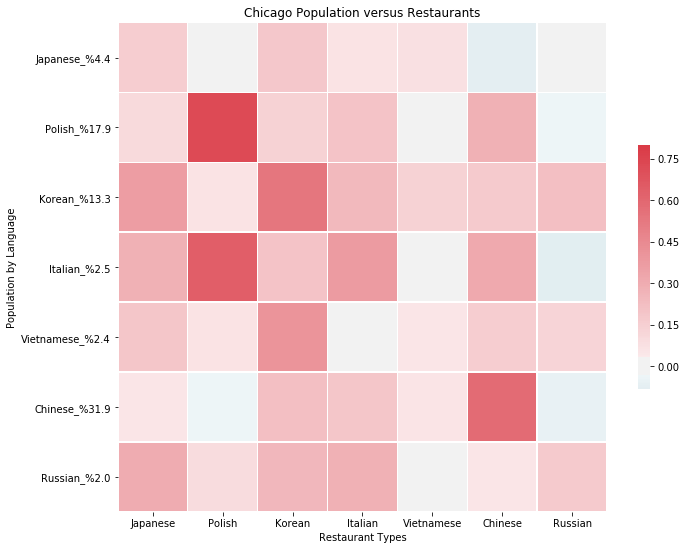

In [129]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_Chicago_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_Chicago_df,  cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Chicago Population versus Restaurants")
plt.xlabel("Restaurant Types")
plt.ylabel("Population by Language")

plt.savefig("../Chart/Restaurant_Population_Corr_Chicago.png")

# Analysis I

### Part II: New York Restaurants and Population Correlation Analysis

In [100]:
## Get Yelp Data by zip Code and Type Pivotal Table
# --------------------------------
# Count restaurants by Zip Code and Type
Yelp_New_York_by_Zipcode_Type_df = Yelp_New_York_df.groupby(["zip","type"])["name"].count().reset_index()
Yelp_New_York_by_Zipcode_Type_df.rename(columns={"name":"count"},inplace=True)
# Convert to pivotal table
Yelp_New_York_by_Zipcode_Type_pt = Yelp_New_York_by_Zipcode_Type_df.pivot(index="zip",columns="type",values="count")
# Fill in 0 for NaN
Yelp_New_York_by_Zipcode_Type_pt = Yelp_New_York_by_Zipcode_Type_pt.fillna(0)
Yelp_New_York_Count_by_Zipcode_Type_df = Yelp_New_York_by_Zipcode_Type_pt.reset_index()
Yelp_New_York_Count_by_Zipcode_Type_df.head()

type,zip,Argentine,Brazilian,British,Bulgarian,Cajun/Creole,Caribbean,Chinese,Cuban,Filipino,...,Japanese,Korean,Malaysian,Mexican,Pakistani,Polish,Portuguese,Russian,Thai,Vietnamese
0,10001,3.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,1.0,11.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
1,10002,1.0,0.0,1.0,1.0,4.0,0.0,9.0,0.0,3.0,...,4.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,4.0,7.0
2,10003,0.0,0.0,2.0,0.0,3.0,0.0,7.0,1.0,3.0,...,12.0,5.0,4.0,10.0,0.0,2.0,0.0,2.0,11.0,6.0
3,10004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [101]:
## Get the common list of group names that will be analyzed
common_name_list = list(set(Yelp_New_York_Count_by_Zipcode_Type_df.columns).intersection(Population_by_Language_New_York_df.columns))
print(common_name_list)

['Japanese', 'Polish', 'French', 'Korean', 'Italian', 'Greek', 'Thai', 'German', 'Vietnamese', 'Chinese', 'Portuguese', 'Russian']


In [102]:
# Extract New York Yelp information needed for analysis
Yelp_New_York_Count_by_Zipcode_Type_Clean_df = Yelp_New_York_Count_by_Zipcode_Type_df[["zip"]+common_name_list]
Yelp_New_York_Count_by_Zipcode_Type_Clean_df.sort_values(by=['zip'],inplace=True)
Yelp_New_York_Count_by_Zipcode_Type_Clean_df.head()

/Users/haolu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


type,zip,Japanese,Polish,French,Korean,Italian,Greek,Thai,German,Vietnamese,Chinese,Portuguese,Russian
0,10001,1.0,0.0,2.0,11.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
1,10002,4.0,0.0,2.0,1.0,2.0,2.0,4.0,3.0,7.0,9.0,1.0,0.0
2,10003,12.0,2.0,5.0,5.0,7.0,2.0,11.0,0.0,6.0,7.0,0.0,2.0
3,10004,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10005,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [103]:
## Extra population data needed for analysis
# Extract Census Population information needed for analysis
Population_by_Language_New_York_Clean_df = Population_by_Language_New_York_df[["Zipcode","Population"]+common_name_list]
Population_by_Language_New_York_Clean_df.sort_values(by=['Zipcode'],inplace=True)
# Population Percentage of each area
Percentage_by_Language_New_York_Clean_df = Population_by_Language_New_York_Clean_df[common_name_list].div(Population_by_Language_New_York_Clean_df.Population,axis=0)                                                                                             

/Users/haolu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [121]:
## Running Correlation Analysis for each ethnical group (Use Absoluate Population Data)
# Update common_name_list, remove small groups that have less than 2% population in any zip code district. 
comon_name_clean_list = []
for name in common_name_list:
    if Percentage_by_Language_New_York_Clean_df[name].max()>=0.02:
        comon_name_clean_list.append(name)

# For each Minority group, calculate the correlation of the population distribution versus the restaurants distribution.
corr_matrix = np.zeros((len(comon_name_clean_list),len(comon_name_clean_list)))

for i in range(len(comon_name_clean_list)):
    name_i = comon_name_clean_list[i]
    for j in range(len(comon_name_clean_list)):
        name_j = comon_name_clean_list[j]
        corr_matrix[i,j] = Population_by_Language_New_York_Clean_df[name_i].corr(Yelp_New_York_Count_by_Zipcode_Type_Clean_df[name_j],method="pearson")
    
Yelp_common_name_list = [name for name in comon_name_clean_list]
Census_common_name_list = [name+"_%"+str(round(Percentage_by_Language_New_York_Clean_df[name].max()*100,1)) for name in comon_name_clean_list]

corr_New_York_df = pd.DataFrame(corr_matrix,index=Census_common_name_list,columns=Yelp_common_name_list)

corr_New_York_df

,Japanese,Polish,French,Korean,Italian,German,Chinese,Portuguese,Russian
Japanese_%4.1,0.477391,0.167089,0.418914,0.498898,0.394887,0.137488,0.287359,0.130372,0.296127
Polish_%2.2,0.118469,-0.067576,0.196145,0.204751,0.204143,0.243595,0.166169,0.362065,0.156401
French_%6.1,0.172234,0.020142,0.334916,0.091471,0.242761,0.084506,0.091039,0.044027,0.021292
Korean_%7.4,0.314421,0.299375,0.295023,0.583517,0.336097,-0.001406,0.198733,0.116297,0.205395
Italian_%2.0,0.395811,0.078273,0.570444,0.248696,0.508676,0.264438,0.197281,0.135430,0.145483
German_%2.2,0.266452,-0.008861,0.302279,0.148747,0.356205,0.140778,0.241883,0.238579,0.049960
Chinese_%35.1,0.242723,-0.001466,0.128757,0.103550,0.089171,0.379368,0.620108,0.504471,-0.024151
Portuguese_%2.4,0.241653,0.116112,0.365883,0.155046,0.337969,-0.022978,0.084856,-0.048359,0.217158
Russian_%5.7,0.225308,-0.070774,0.184397,0.174746,0.160109,0.268905,0.230791,0.367713,0.089897


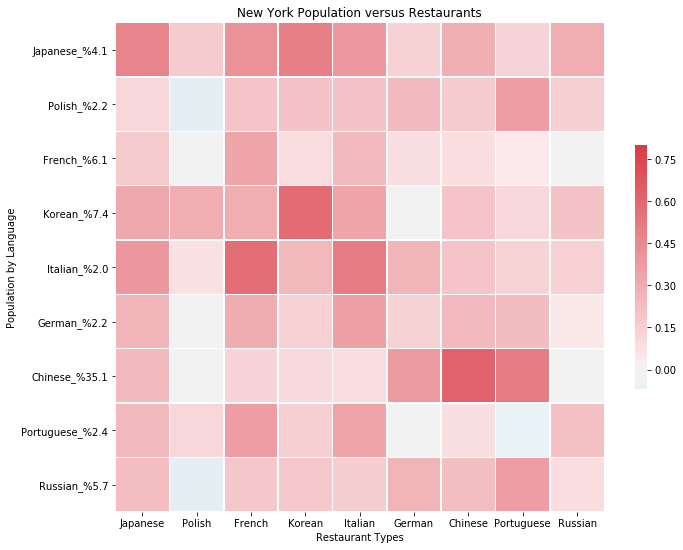

In [125]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_New_York_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_New_York_df,  cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("New York Population versus Restaurants")
plt.xlabel("Restaurant Types")
plt.ylabel("Population by Language")

plt.savefig("../Chart/Restaurant_Population_Corr_New_York.png")

# Analysis II

### Chicago License Issue Date by Restaurant Type

In [131]:
## Clean the data, drop the rows that have NAN value (a.k.a, the restaurant that cannot find in the license data set)
Yelp_License_Merge_Chicago_df.dropna(how='any',inplace=True)
len(Yelp_License_Merge_Chicago_df)

1267

In [134]:
## Get the Issue Year of each Restaurant
Yelp_License_Merge_Chicago_df["Year_Issued"] = pd.DatetimeIndex(Yelp_License_Merge_Chicago_df["Date_Issued"]).year
Yelp_License_Merge_Chicago_df.head()

,zip,city,state,name,price,rating,review_count,type,latitude,longitude,Select_Dist,Select_Name,Date_Issued,Year_Issued
0,60601,Chicago,IL,Wildberry Pancakes and Cafe,$$,4.5,5862,American (New),41.884668,-87.622880,33.761703,WILDBERRY PANCAKES & CAFE,09/13/2017,2017
1,60603,Chicago,IL,The Gage,$$,4.0,2632,American (New),41.881048,-87.624533,36.038212,UNIVERSITY CLUB OF CHICAGO,03/02/2012,2012
2,60603,Chicago,IL,Cindy's,$$,4.0,1387,American (New),41.881689,-87.625006,47.553520,SAI CANDY STORE,04/09/2010,2010
3,60603,Chicago,IL,The Marq,$$,4.0,509,American (New),41.879619,-87.629925,12.416881,THE MARQ,10/11/2016,2016
4,60603,Chicago,IL,Cherry Circle Room,$$$,4.5,330,American (New),41.881664,-87.624969,41.587182,THE CHERRY CIRCLE ROOM,06/30/2017,2017
